In [ ]:
#checklist
#EDA |▼|
#2/2 Classification models |▼|
#Hyperparameters tuning | |

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import torch
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = sns.load_dataset('iris')
#Loading dataset
#We will be looking to classify target column 'species', using feature columns:
#sepal_length, sepal_width, petal_length, petal_width, species

In [ ]:
data.info()
data['species'] = data['species'].astype('category')
#checking for nulls and familiarizing with dtypes, changing species column to category dtype for efficiency.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.tail()
#another look at the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
data['species'].unique()
#Looking at the names of species for classification, these will be our target and prediction output

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Text(0.5, 1.0, 'Histogram & KDE of species')

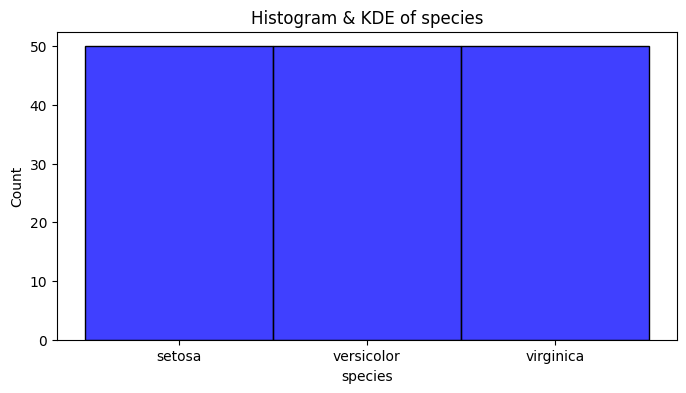

In [ ]:
species = data['species'].copy()
plt.figure(figsize=(8, 4))
sns.histplot(species,  color='blue')
plt.title(f'Histogram & KDE of species')
#visualization of number of irises per species in dataset

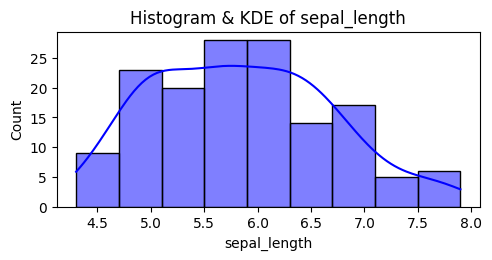

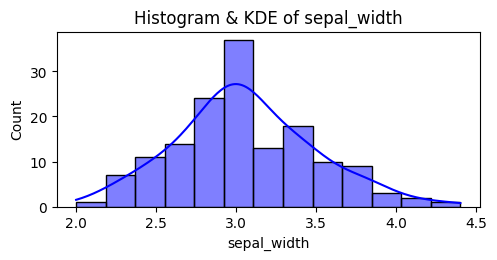

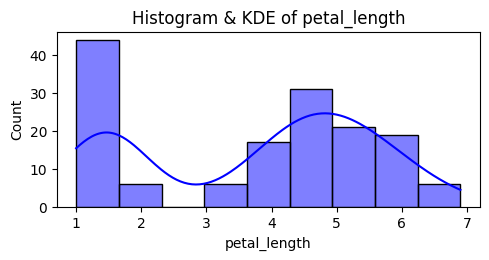

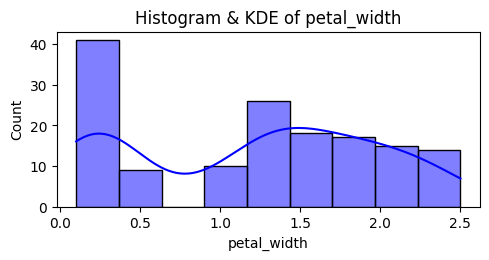

In [ ]:
for column in data.drop('species', axis = 1):
    df = data[column]
    plt.figure(figsize=(12, 5))
    plt.subplot(2, 2, 1)
    sns.histplot(df, kde=True, color='blue')
    plt.title(f'Histogram & KDE of {column}')


In [ ]:
data.isnull().sum()
#no nulls are present in the dataset and distribution is normal
#with slight deviation of petal distibution which does not require changning

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:

#since all features are numerical, no need to onehot encode, they are ready to use in a model

name_list = data.columns
features = data.drop('species',axis=1)
target = data['species']
X = features
y = target

#splitting features and target into X and y for training

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

#splitting training data 80%-20%

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# scaling with StandardScaler due to normal distribution in iris dataset





In [ ]:
# for this project, I chose to use RT classifier, and SVM

In [ ]:
#Using for loop with increasing max_depth parameter to see if accuracy score changes with depth
times = 10
plotx=[]
ploty=[]
for time in range(times):
  if time == 0:
    time+=1
    pass
  else:
    depths = (time)
    rt=tree.DecisionTreeClassifier(max_depth = depths,random_state=42)
    rt.fit(X_train,y_train)
    pred = rt.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    ploty.append(acc_score)
    plotx.append(time)
    # con_mat = confusion_matrix(y_test,pred)
    # class_rep = classification_report(y_test,pred)




Text(0.5, 1.0, 'max depth relating to accuracy score')

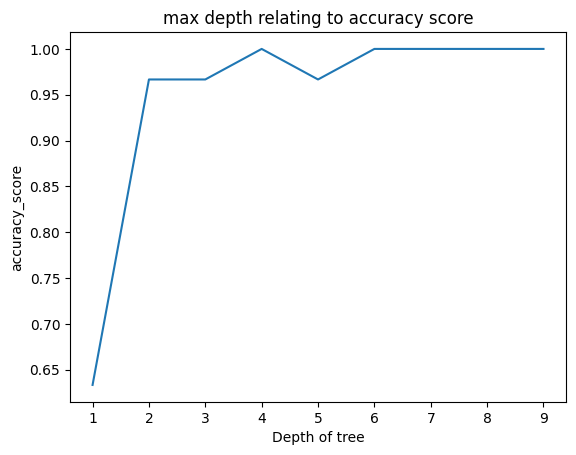

In [ ]:
plt.plot(plotx,ploty)
plt.xlabel('Depth of tree')
plt.ylabel( 'accuracy_score')
plt.title('max depth relating to accuracy score')
#plotting accuracy score with depth

In [ ]:
# Accuracy score seems to increase and cap at 4-5 max_depth

In [ ]:
rt=tree.DecisionTreeClassifier(max_depth = 5,min_samples_leaf=1,random_state=42)
rt.fit(X_train,y_train)
rt_pred = rt.predict(X_test)
rt_class_rep = classification_report(y_test,rt_pred)
print(rt_class_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Using the optimal max_depth, we check if every single sample affects f1-score (our measure for classification success)

In [ ]:
rt=tree.DecisionTreeClassifier(max_depth = 5,min_samples_leaf=2,random_state=42)
rt.fit(X_train,y_train)
rt_pred = rt.predict(X_test)
rt_class_rep = classification_report(y_test,rt_pred)
print(rt_class_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



Already, we see the effects of increasing requirement of min_samples to 2 on f1-score

In [ ]:
rt=tree.DecisionTreeClassifier(max_depth = 5,min_samples_leaf=7,random_state=42)
rt.fit(X_train,y_train)
rt_pred = rt.predict(X_test)
rt_class_rep = classification_report(y_test,rt_pred)
print(rt_class_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



Further increasing min samples does not seem to improve results, in summary, RT should take into consideration every sample, at least in this size dataset

Training SVC with differing kernels and checking f1-score:

In [ ]:
model = SVC(kernel='poly',gamma=0.5,C=0.1,)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)
#try with linear and RBF (gaussian)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [ ]:
model = SVC(kernel='rbf',gamma=0.5,C=0.1)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)
# seems rbf kernel works better for SVC classification

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
model = SVC(kernel='rbf',gamma=0.1,C=0.1)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)
#gamma 0.1

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
model = SVC(kernel='rbf',gamma=2,C=0.1)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)
#gamma 2, results in complex desicionmaking on a simple classification

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.64      1.00      0.78         9
   virginica       1.00      0.55      0.71        11

    accuracy                           0.83        30
   macro avg       0.88      0.85      0.83        30
weighted avg       0.89      0.83      0.83        30



In [ ]:
model = SVC(kernel='rbf',gamma=0.1,C=0.1)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)
#C 0.1

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
model = SVC(kernel='rbf',gamma=0.1,C=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)
#C 10
# it seems having a lower C helps the model stay with high f1-scores due to being less punishing


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



Using our best performing hyperparameter, let's compare our models predictions

In [ ]:
model = SVC(kernel='rbf',gamma=0.1,C=0.1,random_state=42)
model.fit(X_train,y_train)
pred = model.predict(X_test)
class_rep = classification_report(y_test,pred)
print(class_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
rt=tree.DecisionTreeClassifier(max_depth = 5,min_samples_leaf=1,random_state=42)
rt.fit(X_train,y_train)
rt_pred = rt.predict(X_test)
rt_class_rep = classification_report(y_test,rt_pred)
print(rt_class_rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Our classification models have reached the same results on their classification reports

In [ ]:
rt_accuracy = accuracy_score(y_test,rt_pred)
rt_accuracy

0.9666666666666667

In [ ]:
svm_accuracy = accuracy_score(y_test,pred)
svm_accuracy

0.9666666666666667

Our classification models have reached the same results on their accuracy_score

In [ ]:
rt_confusion = confusion_matrix(y_test,rt_pred)
rt_confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

In [ ]:
svm_confusion = confusion_matrix(y_test,pred)
svm_confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]])

Our classification models have reached the same results on their confusion matrices

In conclusion, we have reached the best performance from our classification models we can get according to our testing with hyperparameters